## Creating a Cervix Cancer Prediction Model with RandomForest
#### |By Leonardo Andrade Flores|
In this Jupyter Notebook i explain step by step how to use RandomForest as another way to predict cervix cancer, the first step is to import the libraries, i will be using scikit-learn for the randomforest model, as well as every step related to machine Learning, matplotlib to make the ORC curve graph, pandas for csv processing and joblib for saving the model...

In [109]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as St
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import joblib


## Uploading the Data 
I will use the Cleaned Dataset that i previously downloaded from Kaggle and cleaned it myself.

In [110]:
data=pd.read_csv('CleanData.csv')
data.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

## Splitting the Cleaned Dataset
We split the dataset with  the target variable as **'y'** and **'X'** will be all the variables from the dataset except the target one, setting the test size as 40% from all data. I initilized the random seed at 42 and use the StandarScaler **'st'** to scale the data to have a mean of 0 and a standard deviation of 1. Finally i used SMOTE to resample the data. 

In [112]:
X= data.drop(columns=['Dx'])
y=data['Dx']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)
#-----------------Standardization-----------------
scaler=St()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
joblib.dump(scaler, 'scaler.joblib') 

#-----------------SMOTE for resample the data-----------------
smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f'\n Balanced data for y: {y_train_resampled.shape} vs Original Data for y: {y_train.shape}')
print(f'\n Balanced data for X: {X_train_resampled.shape} vs Original Data for X: {X_train.shape}')



 Balanced data for y: (1000,) vs Original Data for y: (514,)

 Balanced data for X: (1000, 35) vs Original Data for X: (514, 35)


## Random Forest model 
In this model i will not use hyperparametrization so i just set the random forest clasisfier with 100 "decision trees" and a random seed of 42, i sued the resampled data for the training or fitting of the model and finally after training, the model is used to predict outcomes. 

In [113]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled,y_train_resampled)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       334
           1       0.89      0.80      0.84        10

    accuracy                           0.99       344
   macro avg       0.94      0.90      0.92       344
weighted avg       0.99      0.99      0.99       344



In [114]:
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

Accuracy: 0.9912790697674418


## Model Results Evaluation
The model was capable of predidcting 99% of the class 0 (Not cancer) and 89% of class 1 (Cancer) the F1 score balances the precision score and recall score, ending in 100% for predicting non cancer patients, and 84% for predicting patients with cancer, the model has an overall acuraccy of 99.1%. As the model will be complemented with a Computer Vision model for Cervix cancer Prediction, it works pretty well for **predicting risk of cervix cancer in women**. 

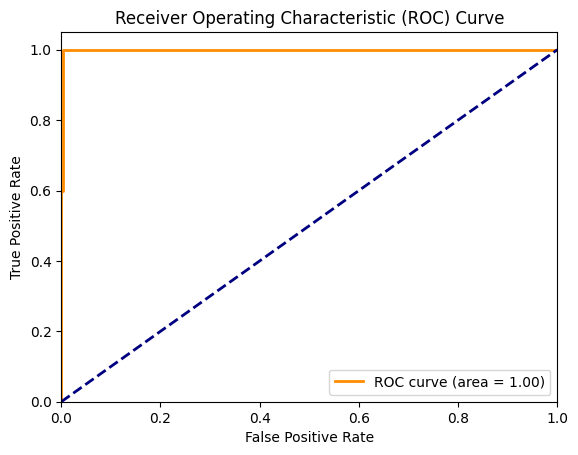

In [115]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC Curve also helps us understand the model, with an area under the curve of 1.00, the model seems prepared for making predictions.

## Making New Predictions 
In order to make new predictions i used data recolected from the Cleaned Dataset, using a patient with positive for cervix cancer, save it on a csv and upload it.

In [116]:
data2=pd.read_csv('Data2.csv')
data2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,32,2,17,1,0,0,0,1,0.5,0,...,0,4,3,0,0,1,0,0,0,0


We have to set the new data into a 2 dimensional array, this is necessary because machine learning models in scikit-learn expect input data to be 2D.Then scale the data that is being given, it adjusts the patient’s data based on the mean and standard deviation (or other parameters) learned from the training set.

In [117]:
patient_features = data2.iloc[0].values.reshape(1, -1)
patient_features_scaled = scaler.transform(patient_features)

C:\Users\lench\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Finally we can make new predictions with   rf_model.predict() and the features of the patient after being reshaped and scaled.
We can also get the probability of the patient to have cervix cancer.

In [118]:
prediction = rf_model.predict(patient_features_scaled)
print(f'The prediction for the patient is : {prediction[0]}')
result = "The patient has big risk for cervix  cancer." if prediction == 1 else "The patient does not have a big risk of cervix cancer."
print(result)
probability = rf_model.predict_proba(patient_features_scaled)
print(f'Probability: {probability}')

The prediction for the patient is : 1
The patient has big risk for cervix  cancer.
Probability: [[0.18 0.82]]


Save the model with joblib.dump

In [119]:
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']